In [1]:


import numpy as np
import pandas as pd



In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
loan_dataset= pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
loan_dataset.head()

,Sheet1/Loan_ID,Sheet1/Gender,Sheet1/Married,Sheet1/Dependents,Sheet1/Education,Sheet1/Self_Employed,Sheet1/ApplicantIncome,Sheet1/CoapplicantIncome,Sheet1/Loan_Amount_Term,Sheet1/Credit_History,Sheet1/Property_Area,Sheet1/Loan_Status,Sheet1/LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N,128.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y,120.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y,141.0


In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [6]:
loan_dataset.shape

(614, 13)

In [7]:
loan_dataset.describe()

,Sheet1/ApplicantIncome,Sheet1/CoapplicantIncome,Sheet1/Loan_Amount_Term,Sheet1/Credit_History,Sheet1/LoanAmount
count,614.000000,614.000000,600.00000,564.000000,592.000000
mean,5403.459283,1621.245798,342.00000,0.842199,146.412162
std,6109.041673,2926.248369,65.12041,0.364878,85.587325
min,150.000000,0.000000,12.00000,0.000000,9.000000
25%,2877.500000,0.000000,360.00000,1.000000,100.000000
50%,3812.500000,1188.500000,360.00000,1.000000,128.000000
75%,5795.000000,2297.250000,360.00000,1.000000,168.000000
max,81000.000000,41667.000000,480.00000,1.000000,700.000000


In [8]:
loan_dataset.isnull().sum()


,0
Sheet1/Loan_ID,0
Sheet1/Gender,13
Sheet1/Married,3
Sheet1/Dependents,15
Sheet1/Education,0
Sheet1/Self_Employed,32
Sheet1/ApplicantIncome,0
Sheet1/CoapplicantIncome,0
Sheet1/Loan_Amount_Term,14
Sheet1/Credit_History,50


In [9]:
loan_dataset.replace({"Sheet1/Loan_Status": {'N': 0, 'Y': 1}}, inplace=True)

<ipython-input-9-064095b883e7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Sheet1/Loan_Status": {'N': 0, 'Y': 1}}, inplace=True)


In [10]:
loan_dataset.head()

,Sheet1/Loan_ID,Sheet1/Gender,Sheet1/Married,Sheet1/Dependents,Sheet1/Education,Sheet1/Self_Employed,Sheet1/ApplicantIncome,Sheet1/CoapplicantIncome,Sheet1/Loan_Amount_Term,Sheet1/Credit_History,Sheet1/Property_Area,Sheet1/Loan_Status,Sheet1/LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,1,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,0,128.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,1,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,1,120.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,1,141.0


In [11]:
print(loan_dataset.columns)

Index(['Sheet1/Loan_ID', 'Sheet1/Gender', 'Sheet1/Married',
       'Sheet1/Dependents', 'Sheet1/Education', 'Sheet1/Self_Employed',
       'Sheet1/ApplicantIncome', 'Sheet1/CoapplicantIncome',
       'Sheet1/Loan_Amount_Term', 'Sheet1/Credit_History',
       'Sheet1/Property_Area', 'Sheet1/Loan_Status', 'Sheet1/LoanAmount'],
      dtype='object')


In [12]:
loan_dataset['Sheet1/Dependents'].value_counts()

,count
Sheet1/Dependents,
0,345
1,102
2,101
3+,51


In [13]:
loan_dataset=loan_dataset.replace(to_replace='3+',value='4')

In [14]:
loan_dataset['Sheet1/Dependents'].value_counts()

,count
Sheet1/Dependents,
0,345
1,102
2,101
4,51


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sheet1/Education', ylabel='count'>

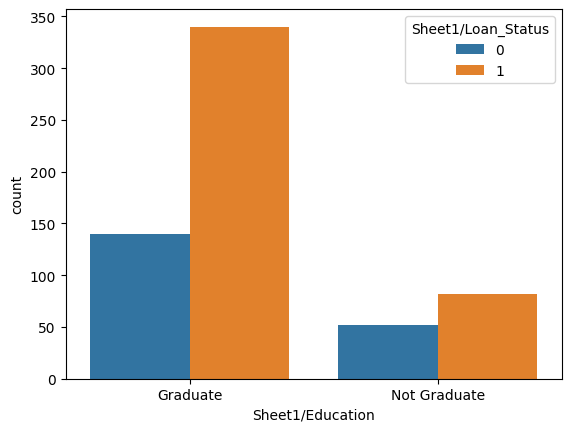

In [15]:
sns.countplot(x='Sheet1/Education',hue='Sheet1/Loan_Status',data=loan_dataset)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sheet1/Married', ylabel='count'>

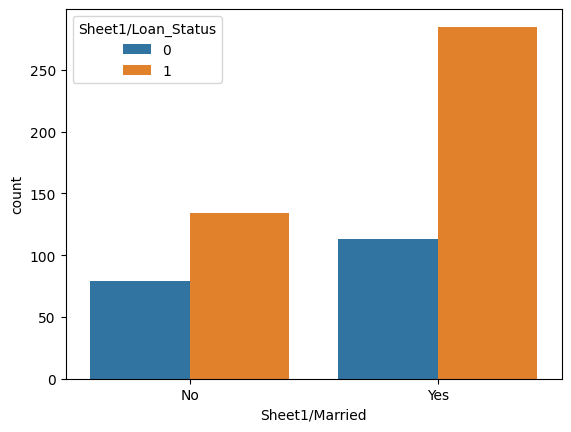

In [16]:
sns.countplot(x='Sheet1/Married',hue='Sheet1/Loan_Status',data=loan_dataset)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sheet1/Gender', ylabel='count'>

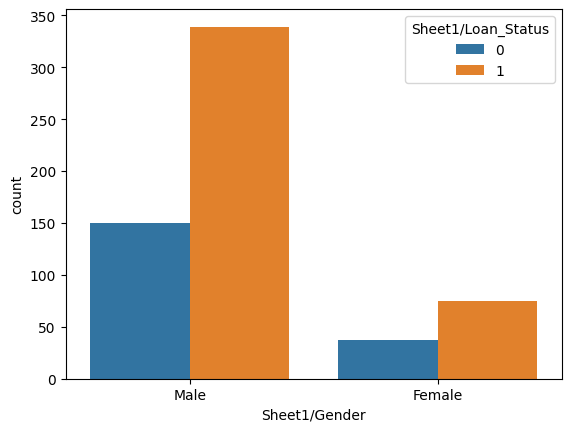

In [17]:
sns.countplot(x='Sheet1/Gender',hue='Sheet1/Loan_Status',data=loan_dataset)

In [18]:
loan_dataset.replace({"Sheet1/Married": {'No': 0, 'Yes': 1}}, inplace=True)

<ipython-input-18-16e16631b8ac>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Sheet1/Married": {'No': 0, 'Yes': 1}}, inplace=True)


In [19]:
loan_dataset.head()

,Sheet1/Loan_ID,Sheet1/Gender,Sheet1/Married,Sheet1/Dependents,Sheet1/Education,Sheet1/Self_Employed,Sheet1/ApplicantIncome,Sheet1/CoapplicantIncome,Sheet1/Loan_Amount_Term,Sheet1/Credit_History,Sheet1/Property_Area,Sheet1/Loan_Status,Sheet1/LoanAmount
0,LP001002,Male,0.0,0,Graduate,No,5849,0.0,360.0,1.0,Urban,1,NaN
1,LP001003,Male,1.0,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,0,128.0
2,LP001005,Male,1.0,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,1,66.0
3,LP001006,Male,1.0,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,1,120.0
4,LP001008,Male,0.0,0,Graduate,No,6000,0.0,360.0,1.0,Urban,1,141.0


In [20]:
loan_dataset.replace({"Sheet1/Gender": {'Male': 1, 'Female': 0}}, inplace=True)

<ipython-input-20-d29d54a8b6cd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Sheet1/Gender": {'Male': 1, 'Female': 0}}, inplace=True)


In [21]:
loan_dataset.replace({"Sheet1/Self_Employed": {'No': 0, 'Yes': 1}}, inplace=True)

<ipython-input-21-d05d2fbb85a6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Sheet1/Self_Employed": {'No': 0, 'Yes': 1}}, inplace=True)


In [22]:
loan_dataset.replace({"Sheet1/Property_Area": {'Rural': 0, 'Semiurban': 1,'Urban':2}}, inplace=True)

<ipython-input-22-ea9eb170bc7b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Sheet1/Property_Area": {'Rural': 0, 'Semiurban': 1,'Urban':2}}, inplace=True)


In [23]:
loan_dataset.replace({"Sheet1/Education": {'Graduate': 1, 'Not Graduate': 0,}}, inplace=True)

<ipython-input-23-128629c2abe1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Sheet1/Education": {'Graduate': 1, 'Not Graduate': 0,}}, inplace=True)


In [24]:
loan_dataset.head()

,Sheet1/Loan_ID,Sheet1/Gender,Sheet1/Married,Sheet1/Dependents,Sheet1/Education,Sheet1/Self_Employed,Sheet1/ApplicantIncome,Sheet1/CoapplicantIncome,Sheet1/Loan_Amount_Term,Sheet1/Credit_History,Sheet1/Property_Area,Sheet1/Loan_Status,Sheet1/LoanAmount
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,360.0,1.0,2,1,NaN
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,360.0,1.0,0,0,128.0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,360.0,1.0,2,1,66.0
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,360.0,1.0,2,1,120.0
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,360.0,1.0,2,1,141.0


In [25]:
X= loan_dataset.drop(columns=['Sheet1/Loan_ID','Sheet1/Loan_Status'],axis=1)

In [26]:
Y=loan_dataset['Sheet1/Loan_Status']

In [27]:
print(X)

     Sheet1/Gender  Sheet1/Married Sheet1/Dependents  Sheet1/Education  \
0              1.0             0.0                 0                 1   
1              1.0             1.0                 1                 1   
2              1.0             1.0                 0                 1   
3              1.0             1.0                 0                 0   
4              1.0             0.0                 0                 1   
..             ...             ...               ...               ...   
609            0.0             0.0                 0                 1   
610            1.0             1.0                 4                 1   
611            1.0             1.0                 1                 1   
612            1.0             1.0                 2                 1   
613            0.0             0.0                 0                 1   

     Sheet1/Self_Employed  Sheet1/ApplicantIncome  Sheet1/CoapplicantIncome  \
0                     0.0       

In [28]:
print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Sheet1/Loan_Status, Length: 614, dtype: int64


In [29]:
X_train,X_test,Y_train,Y_test=train=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (552, 11) (62, 11)


In [31]:
classifier=svm.SVC(kernel='linear')

In [38]:


!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import svm

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [33]:
 X_train_prediction=classifier.predict(X_train)
training_data_accuray=accuracy_score(X_train_prediction,Y_train)

In [34]:
print('Accuracy on training data',training_data_accuray)

Accuracy on training data 0.8007246376811594


In [35]:
X_test_prediction=classifier.predict(X_test)
test_data_accuray=accuracy_score(X_test_prediction,Y_test)

In [36]:
print('Accuracy on test data',test_data_accuray)

Accuracy on test data 0.8064516129032258


In [37]:


import numpy as np
input_data=(1,0,0,0,0,3200,2254,180,0,2,126)

input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=classifier.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('Loan Status is NO')
else:
    print('Loan Status is YES')


[0]
Loan Status is NO
